# Gradient Descent
---
Gradient descent is an iterative optimization algorithm with the goal of finding the local minimum of a smooth, real-valued, differentiable function $f(x)$. Gradient descent accomplishes this by subtracting the gradient of the function multiplied by $\alpha$, which represents the **learning rate**, to obtain the new value of $x$. Each iteration of this algorithm can also be called a **step** with $\alpha$ representing the **step size**. This process can be represented by the equation: 

$$x^{k+1}=x^k-\alpha\nabla f(x^k)$$

First, let's look at a demonstration of gradient descent on a simple function such as: 
$$f(x,y)=3(x-4)^2 + y^2$$

The **gradient** of this function is a vector that consists of its partial derivatives and looks like this:

$$\nabla f(x,y)=\begin{bmatrix}6(x-4)\\2y\end{bmatrix}$$

---

In [1]:
# Loading packages
using Plots
using Random
using CSV

# Creating sample function
f(x,y) = 3(x-4)^2 + y^2
∇f(x,y) = [6*(x-4), 2y];

---

Now that we have our function and gradient coded, let's look at the 3-Dimensional plot of our data.

---

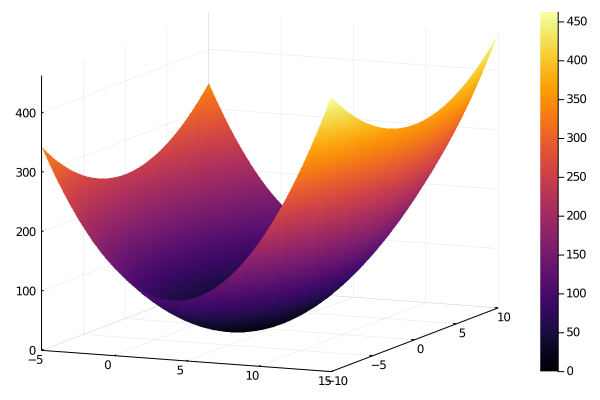

In [2]:
x = -5:0.5:15
y = -10:0.5:10

plot(x,y,f, st=:surface)

---
Looking at the plot of our data, there is clearly a global minimum for us to find. This visual allows us to verify the effectiveness of the gradient descent algorithm for this problem so we are able to proceed with solving it. However, in order to make the plot easier to look out for demonstration purposes we can convert it to a contour plot which will show the progress of our steps more clearly.

---

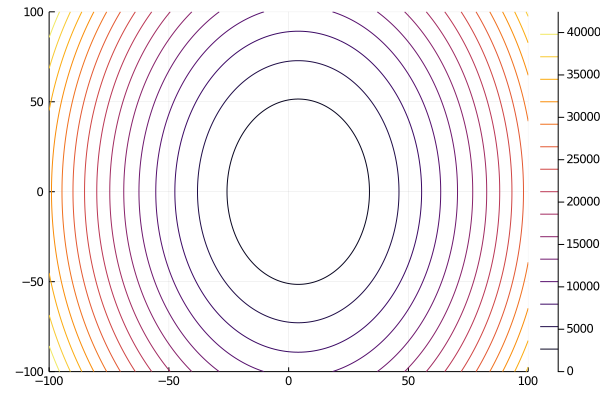

In [3]:
x = -100:0.5:100
y = -100:0.5:100

p1 = contour(x, y, f)
plot(p1)

---
From here we need to select a point at which to begin iterations of our gradient descent algorithm. I've chosen to begin at (-1,5) for this demonstration.

---

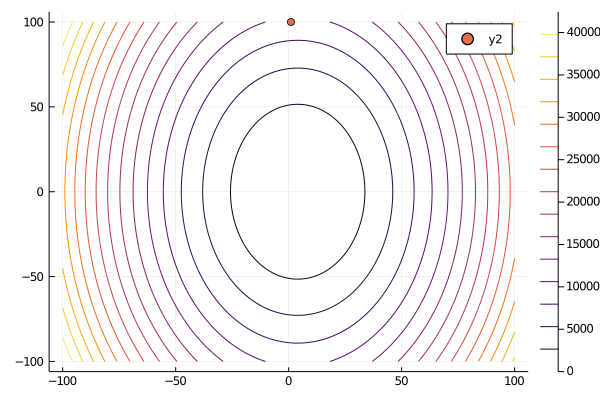

In [4]:
x0 = [-1,5]
scatter!([f(x0[1], x0[2])])

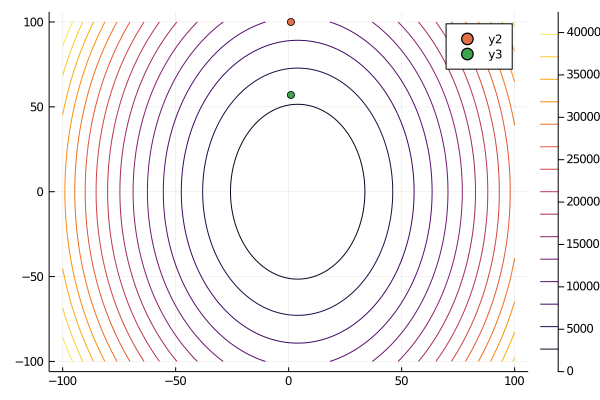

In [5]:
# First iteration
x1 = x0 - 0.05*∇f(x0[1], x0[2])
scatter!([f(x1[1], x1[2])])

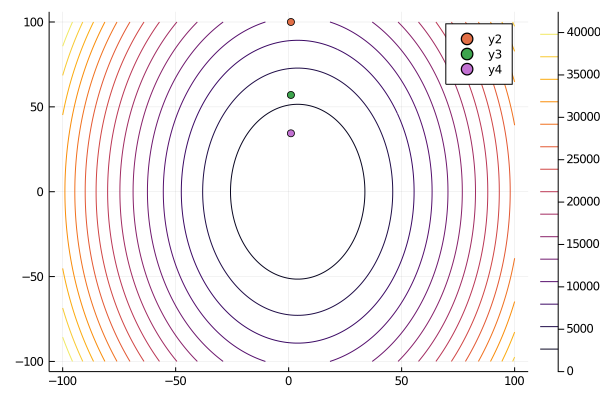

In [6]:
# Second iteration
x2 = x1 - 0.05*∇f(x1[1], x1[2])
scatter!([f(x2[1], x2[2])])

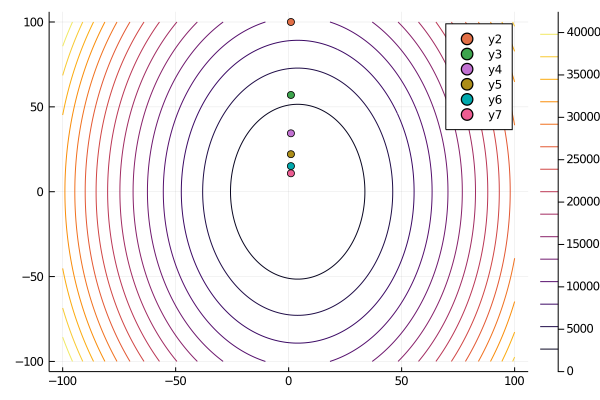

In [7]:
# Third through ______ iteration
x3 = x2 - 0.05*∇f(x2[1], x2[2])
scatter!([f(x3[1], x3[2])])

x4 = x3 - 0.05*∇f(x3[1], x3[2])
scatter!([f(x4[1], x4[2])])

x5 = x4 - 0.05*∇f(x4[1], x4[2])
scatter!([f(x5[1], x5[2])])

---
So as you can see, through repeated iterations we are able to take *steps* toward the minimum of the function in order to optimize it using gradient descent. This method of optimization is very widely used in many machine learning algorithms due to its flexibility. One algorithm that benefits from applications of gradient descent is linear regression. Below is an example of gradient descent applied to a linear regression problem.

---

# Applications to Linear Regression
---

When applying gradient descent to linear regression, the thing that you are are trying to minimize is the **Mean Squared Error (MSE)** which measures the average error between your fitted regression line and the data that you have. By minimizing the value of the MSE you are able to verify that your model has the best possible fit before you use to attempt to predict future values using unknown data. MSE is found by calculating the sum of all the differences between your model outputs and actual data values, squaring it, and then dividing by the number of values you have in total to find the mean (hence Mean Squared Error). The formula for this process will serve the same function as our f(x,y) in the previous example and is shown here:

$$MSE(w,b) = \frac{1}{N} \sum^N_{i=1}(y_i-(wx_i+b))^2$$ 

MSE(w,b) can also be called C(w,b), or the **cost function** for our optimization. In order to find the gradient vector we will need to take the partial derivatives of the MSE equation which will give us:
$$\nabla MSE(w,b) = \begin{bmatrix}\frac{-2}{N} \sum^N_{i=1}(y_i-(wx_i+b))x_i
                                \\ \frac{-2}{N} \sum^N_{i=1}(y_i-(wx_i+b))\end{bmatrix}$$

With these partial derivatives we can create the following optimization equations:
$$w^{k+1} = w^k - \alpha(\frac{-2}{N} \sum^N_{i=1}x_i(y_i-(wx_i+b)))$$
$$b^{b+1} = b^k - \alpha(\frac{-2}{N} \sum^N_{i=1}(y_i-(wx_i+b)))$$

For this example we will be using sample advertising data consisting of money spent on *TV*, *radio*, and *newspaper* advertising in order to try and predict *sales*. First thing's first, let's load in our data and take a look at it.

---

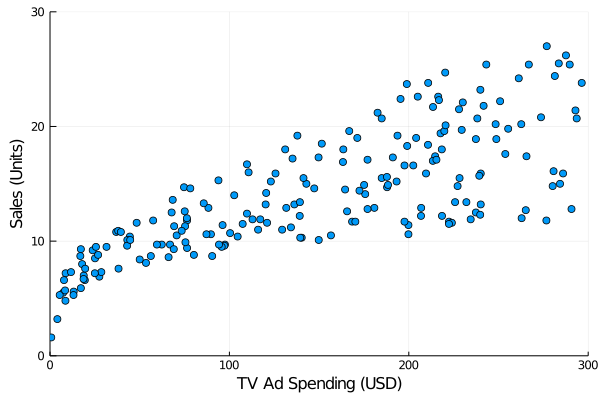

In [57]:
data = CSV.read("Advertising.csv")

x_data = data.TV
y_data = data.sales
data_tuples = [x for x in zip(x_data, y_data)]

scatter(data_tuples,
        xlim = (0, 300),
        ylim = (0,30),
        xaxis = "TV Ad Spending (USD)",
        yaxis = "Sales (Units)",
        legend = false)

---
Explain **batch gradient descent** here.

---

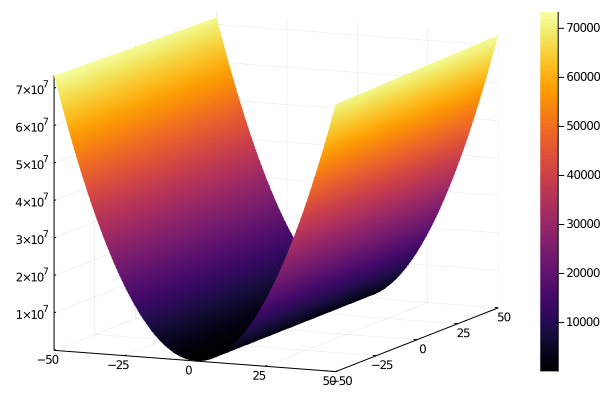

In [59]:
# Cost function
C(w, b) = (1/length(x_data)) * sum([(y_data[i] - (w*x_data[i] + b))^2 for i = 1:length(x_data)])

w = -50:0.5:50
b = -50:0.5:50

plot(w, b, C, st = :surface)

In [60]:
function batch_gradient_descent(x_data, y_data, w, b, α)
    N = length(x_data)
    
    w = w - α*(-2/N)*sum([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    b = b - α*(-2/N)*sum([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w, b
end

batch_gradient_descent (generic function with 1 method)

In [61]:
function batch_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i==1
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==100
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==1000
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==10000
            println("Epoch ", i, " with cost ", C(w,b))
        end
    end
    
    return w,b
end

batch_train (generic function with 1 method)

Epoch 1 with cost 22.18448078929909


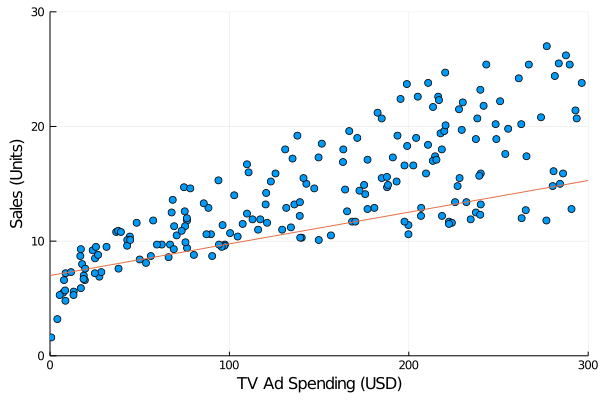

In [70]:
w,b = batch_train(x_data, y_data, 0.0, 7.0, 0.00001, 1)

scatter(data_tuples,
        xlim = (0, 300),
        ylim = (0,30),
        xaxis = "TV Ad Spending (USD)",
        yaxis = "Sales (Units)",
        legend = false)
plot!(x-> x*w + b,
        xlim = (0,300),
        ylim = (0,30),
        legend = false)

---
Discuss results from 1 iteration.

---

Epoch 1 with cost 22.18448078929909
Epoch 100 with cost 10.512920041614944
Epoch 1000 with cost 10.512917616956518
Epoch 10000 with cost 10.512894548454252


w after 10,000 iterations: 0.04769349065008782
b after 10,000 iterations: 7.001706892855573


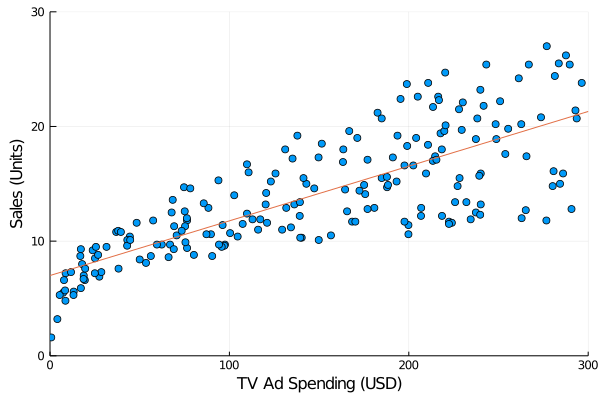

In [71]:
w, b = batch_train(x_data, y_data, 0.0, 7.0, 0.00001, 10000)
println("\n\nw after 10,000 iterations: ", w)
println("b after 10,000 iterations: ", b)

scatter(data_tuples,
        xlim = (0, 300),
        ylim = (0,30),
        xaxis = "TV Ad Spending (USD)",
        yaxis = "Sales (Units)",
        legend = false)
plot!(x-> x*w + b,
        xlim = (0,300),
        ylim = (0,30),
        legend = false)

---
So after 10,000 iterations, we end up with a line that reasonably approximates the number of units sold when given the amount of money spent on TV advertisements. The regression line we ended up with after 10,000 steps is:
$$Units old = 0.047693 * TVAdSpending + 7.001707$$

---